In [1]:
%matplotlib inline

import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np


In [2]:
diamonds = pd.read_csv('../data/diamonds_clean.csv')
diamonds.drop('Unnamed: 0', axis=1, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_index,color_index
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


In [3]:
# DATASET PREPARATION

# Cut is an ordinal feature, define order to sort data
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds.cut = pd.Categorical(diamonds.cut, categories = cut_categories)


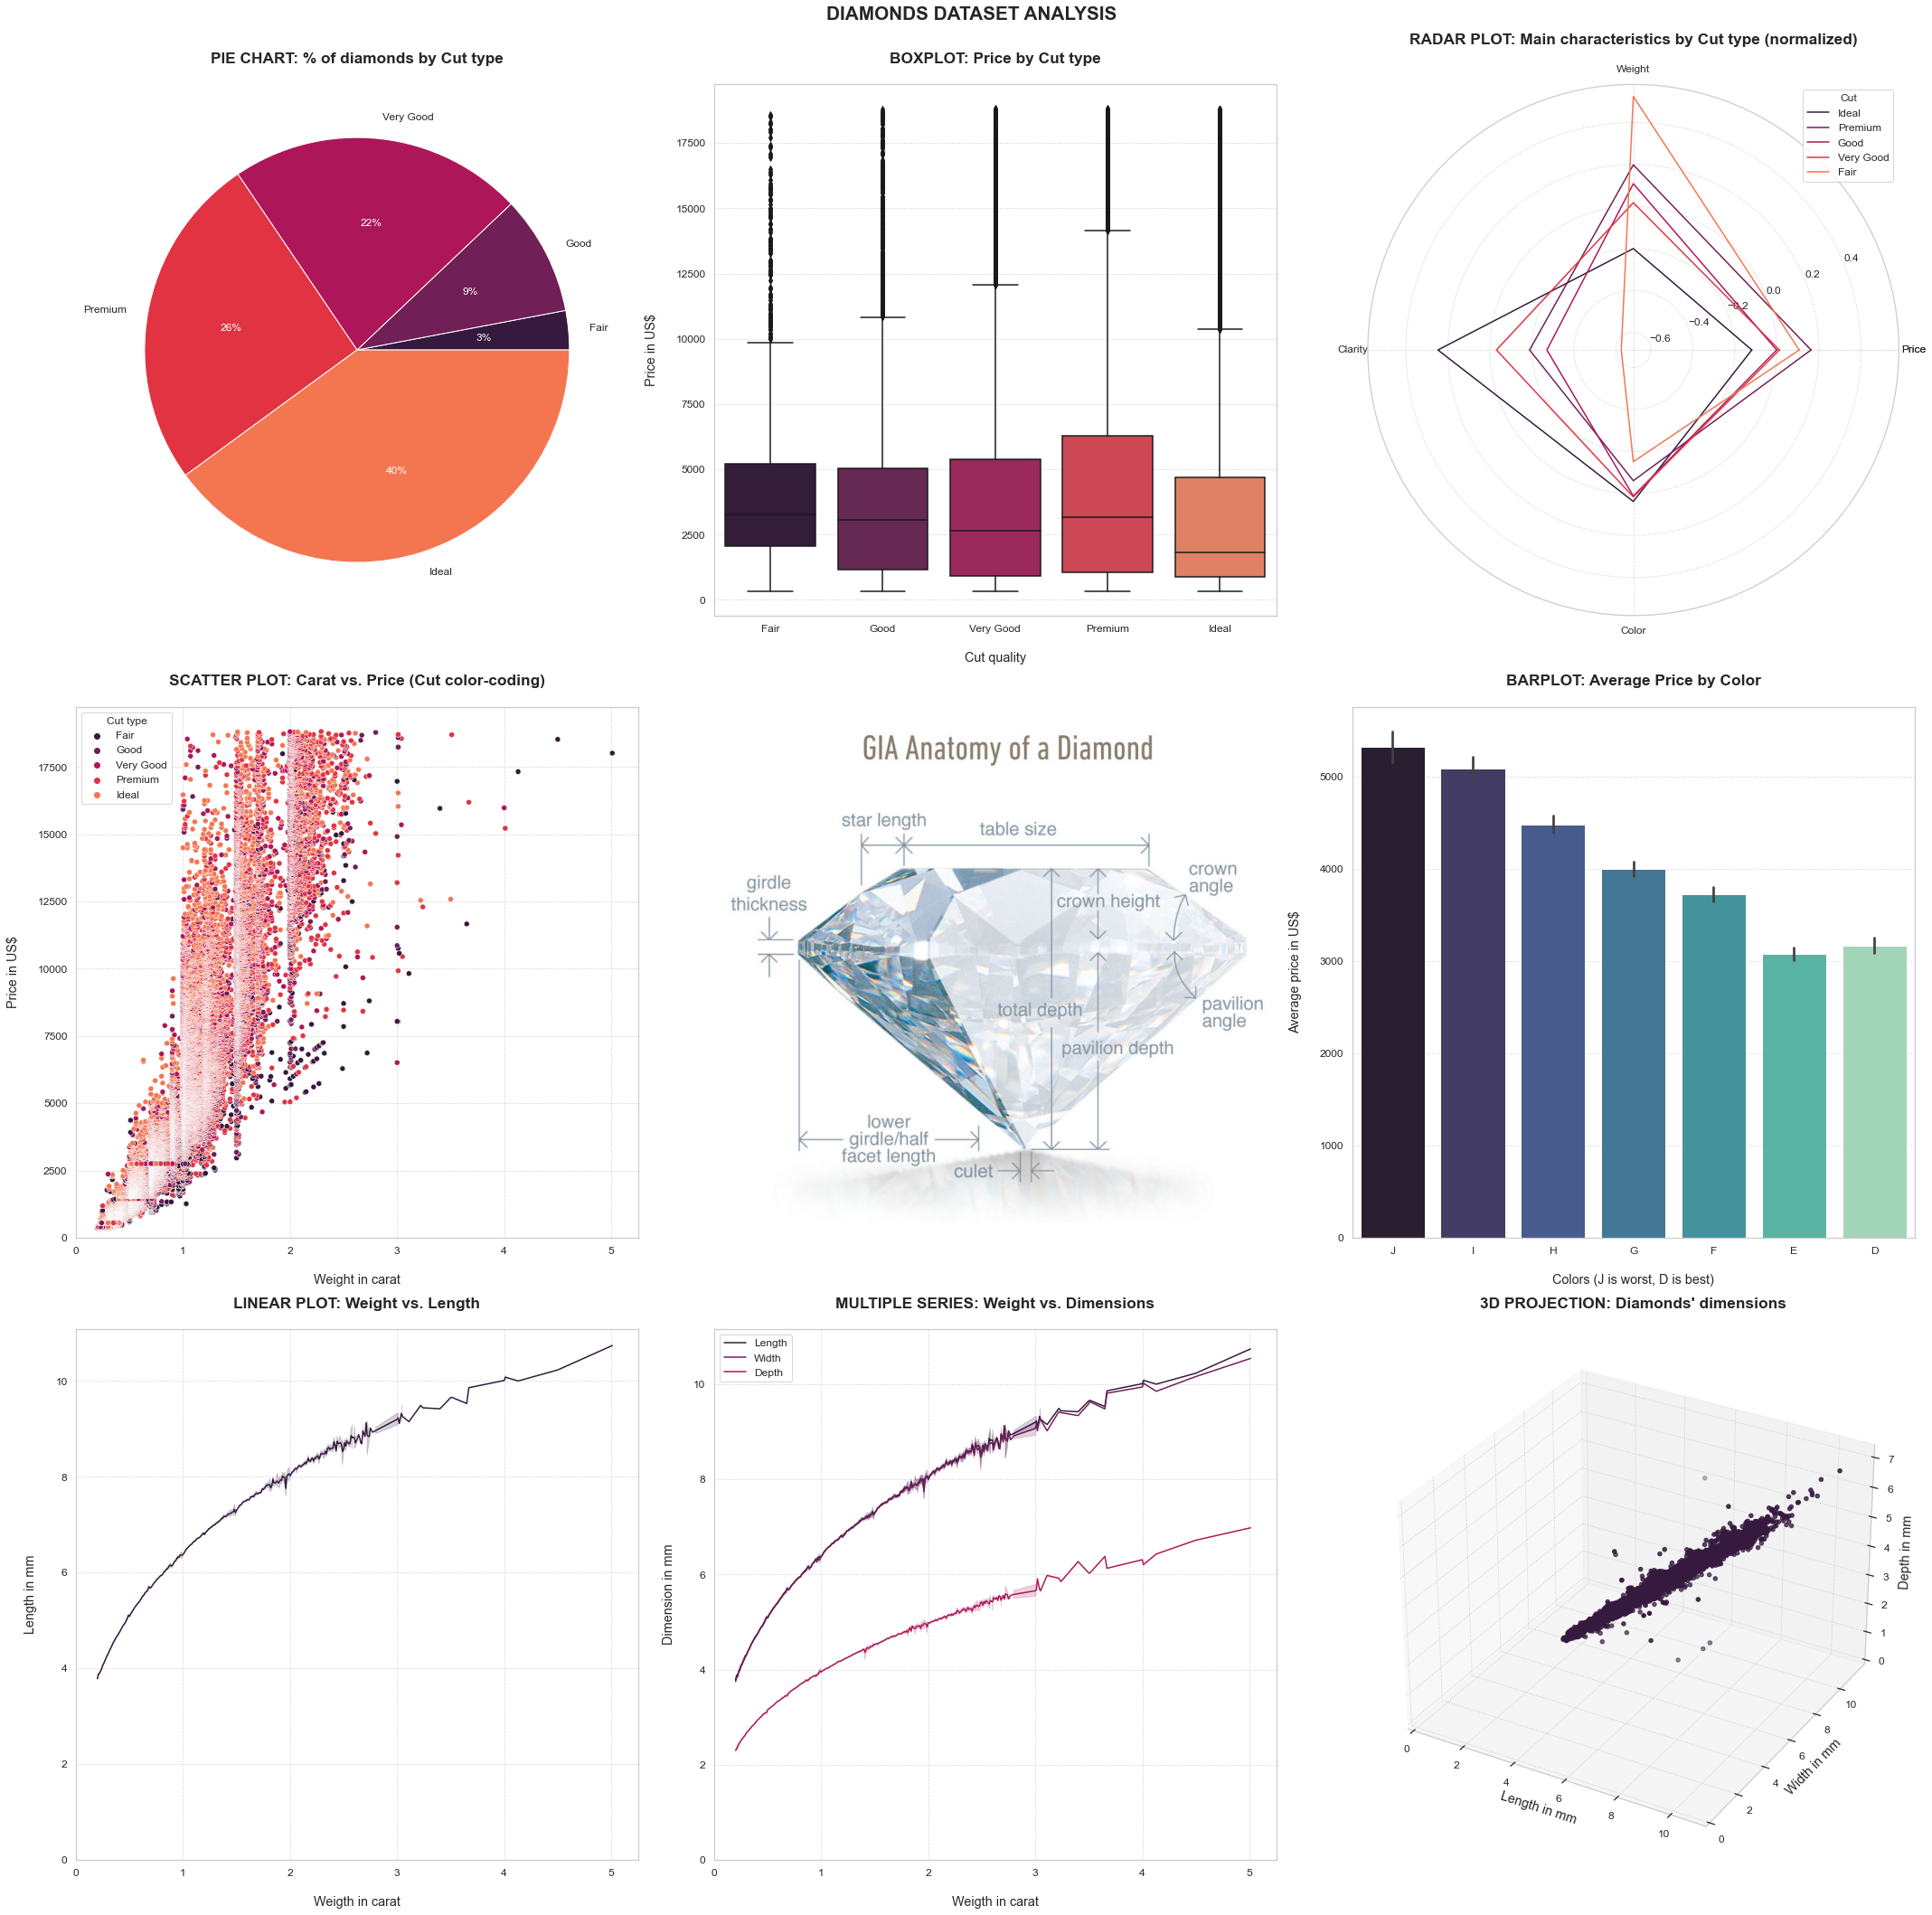

In [5]:
# FIGURE PREPARATION

sns.set_theme(style = 'whitegrid', palette = 'rocket')
plt.style.use('../style_sheets/style_sheet.mplstyle')
fig = plt.figure(figsize=(30,30))


# 1. PIE CHART - DOES NOT EXIST IN SEABORN: USE MATPLOTLIB ONLY
ax1 = fig.add_subplot(331)

diamonds_pie = diamonds.value_counts('cut').reset_index(level=0)
diamonds_pie.cut = pd.Categorical(diamonds_pie.cut, categories = cut_categories)
diamonds_pie.sort_values(by='cut',inplace=True)


_, _, autotexts = ax1.pie(diamonds_pie[0], autopct = '%0.0f%%', labels = diamonds_pie.cut)
for autotext in autotexts:
    autotext.set_color('white')
ax1.set_title('PIE CHART: % of diamonds by Cut type\n')


# 2. BOXPLOT
ax2 = fig.add_subplot(332)
sns.boxplot(x = 'cut', y = 'price', data = diamonds, ax = ax2)
ax2.set_xlabel('\nCut quality')
ax2.set_ylabel('Price in US$\n')
ax2.set_title('BOXPLOT: Price by Cut type\n')


# 3. RADAR - DOES NOT EXIST NATIVELY IN SEABORN
ax3 = fig.add_subplot(333, polar = True)

# Normalization of data [-1; 1]
normalized_diamonds = pd.DataFrame()
for col in diamonds.columns:
    # Normalize numeric columns only
    if is_numeric_dtype(diamonds[col]):
        normalized_diamonds[col]=(diamonds[col]-diamonds[col].mean())/diamonds[col].std()
    # Other columncs remain the same
    else:
        normalized_diamonds[col]=diamonds[col]


categories = ['Price', 'Weight', 'Clarity', 'Color']
categories = [*categories, categories[0]]
# Split the circle in 4 angles of same size
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

d = {}
for cut in diamonds.cut.unique():
    d[cut] = normalized_diamonds.loc[normalized_diamonds.cut == cut, ['price', 'carat', 'clarity_index', 'color_index', 'price']].mean().to_list()
    ax3.plot(label_loc, d[cut], label = cut)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
ax3.set_title('RADAR PLOT: Main characteristics by Cut type (normalized)\n')
ax3.legend(title = 'Cut')


# 4. SCATTER PLOT
ax4 = fig.add_subplot(334)
sns.scatterplot(x = 'carat', y = 'price', data = diamonds, hue = 'cut', ax = ax4)
ax4.set_xlim(left = 0)
ax4.set_xlabel('\nWeight in carat')
ax4.set_ylabel('Price in US$\n')
ax4.set_ylim(bottom = 0)
ax4.set_title('SCATTER PLOT: Carat vs. Price (Cut color-coding)\n')
ax4.legend(title = 'Cut type')


# 5. IMAGE
ax5 = fig.add_subplot(335)
image = img.imread('../style_sheets/diamond.jpeg')
ax5.imshow(image)
ax5.axis('off')


# 6. BAR PLOT
ax6 = fig.add_subplot(336)
sns.barplot(x = 'color', y = 'price', data = diamonds.sort_values(by='color', ascending=False), palette = 'mako', ax = ax6)
ax6.set_xlabel('\nColors (J is worst, D is best)')
ax6.set_ylabel('Average price in US$\n')
ax6.set_title('BARPLOT: Average Price by Color\n')


# 7. LINEAR PLOT
ax7 = fig.add_subplot(337)
sns.lineplot(x = 'carat', y = 'x', data = diamonds, ax = ax7)
ax7.set_xlim(left = 0)
ax7.set_xlabel('\nWeigth in carat')
ax7.set_ylim(bottom = 0)
ax7.set_ylabel('Length in mm\n')
ax7.set_title('LINEAR PLOT: Weight vs. Length\n')


# 8. MULTIPLE SERIES
ax8 = fig.add_subplot(338)
sns.lineplot(x = 'carat', y = 'x', data = diamonds, ax = ax8)
sns.lineplot(x = 'carat', y = 'y', data = diamonds, ax = ax8)
sns.lineplot(x = 'carat', y = 'z', data = diamonds, ax = ax8)
ax8.set_xlim(left = 0)
ax8.set_xlabel('\nWeigth in carat')
ax8.set_ylim(bottom = 0)
ax8.set_ylabel('Dimension in mm\n')
ax8.set_title('MULTIPLE SERIES: Weight vs. Dimensions\n')
ax8.legend(labels = ['Length', 'Width', 'Depth'])


# 9. 3D PROJECTION
ax9 = fig.add_subplot(339, projection = '3d')
ax9.scatter(diamonds.x, diamonds.y, diamonds.z, cmap = plt.get_cmap('viridis'))

ax9.set_title('3D PROJECTION: Diamonds\' dimensions\n')
ax9.set_xlim(left = 0)
ax9.set_xlabel('Length in mm')
ax9.set_ylim(bottom = 0)
ax9.set_ylabel('Width in mm')
ax9.set_zlabel('Depth in mm')
ax9.set_zlim(bottom = 0)

# DISPLAY
fig.suptitle('DIAMONDS DATASET ANALYSIS')
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()